# PS3-4 Semi-supervised EM

### Derivation of Semi-supervised E-step and M-step.

First, plugin probability distribution $Q_i(z^{(i)})$ into the objective $l_{\text{semi-sup}}(\theta)$:

\begin{align*}
l_{\text{semi-sup}}(\theta)&=\sum_{i=1}^m\log\sum_{z^{(i)}}p(x^{(i)},z^{(i)};\theta)+\alpha l_{\text{sup}}(\theta)\\
&=\sum_{i=1}^m\log\sum_{z^{(i)}}Q_{i}(z^{(i)})\left[\frac{p(x^{(i)},z^{(i)};\theta)}{Q_{i}(z^{(i)})}\right]+\alpha l_{\text{sup}}(\theta)\\
&=\sum_{i=1}^m\log\mathbb E_{z^{(i)}\sim Q_i}\left[\frac{p(x^{(i)},z^{(i)};\theta)}{Q_{i}(z^{(i)})}\right]+\alpha l_{\text{sup}}(\theta).\\
\end{align*}

Since $\log x$ is concave, from Jensen's inequality we have

\begin{align*}
l_{\text{semi-sup}}(\theta)&\ge\sum_{i=1}^m\mathbb E_{z^{(i)}\sim Q_i}\left[\log\frac{p(x^{(i)},z^{(i)};\theta)}{Q_{i}(z^{(i)})}\right]+\alpha l_{\text{sup}}(\theta).\\
\end{align*}

Note that $Q_i$ can be any distribution and we want $\log\mathbb E_{z^{(i)}\sim Q_i}\left[\frac{p(x^{(i)},z^{(i)};\theta)}{Q_{i}(z^{(i)})}\right]=\mathbb E_{z^{(i)}\sim Q_i}\left[\log\frac{p(x^{(i)},z^{(i)};\theta)}{Q_{i}(z^{(i)})}\right]$. 

From Jensen's inequality we know it's true if and only if $\frac{p(x^{(i)},z^{(i)};\theta)}{Q_{i}(z^{(i)})}$ is a constant. Therefore, we can set

\begin{align*}
Q_i(z^{(i)})&:=\frac{p(x^{(i)},z^{(i)};\theta)}{\sum_{z^{(i)}}p(x^{(i)},z^{(i)};\theta)}\\
&=\frac{p(x^{(i)},z^{(i)};\theta)}{p(x^{(i)};\theta)}\\
&=p(z^{(i)}|x^{(i)};\theta).
\end{align*}

Therefore, for each iteration $t$ we set

$$Q_i^{(t)}(z^{(i)})=p(z^{(i)}|x^{(i)};\theta^{(t)})$$

in E-step. In M-step we update $\theta$ by setting

$$\theta^{(t+1)}=\arg\max_\theta\left[\sum_{i=1}^m\mathbb E_{z^{(i)}\sim Q_i}\left[\log\frac{p(x^{(i)},z^{(i)};\theta)}{Q_{i}(z^{(i)})}\right]+\alpha\left(\sum_{i=1}^{\tilde m}\log p(\tilde x^{(i)},\tilde z^{(i)};\theta)\right)\right].$$

### (a) Convergence

By setting $Q_i^{(t)}(z^{(i)})=p(z^{(i)}|x^{(i)};\theta^{(t)})$ in E-step,

$$l_{\text{semi-sup}}(\theta^{(t)})=\sum_{i=1}^m\mathbb E_{z^{(i)}\sim Q_i}\left[\log\frac{p(x^{(i)},z^{(i)};\theta^{(t)})}{Q_{i}(z^{(i)})}\right]+\alpha l_{\text{sup}}(\theta^{(t)}),$$

and in M-step we maximize $l_{\text{semi-sup}}(\theta^{(t)})$ and get $\theta^{(t+1)}$, i.e.,

$$\theta^{(t+1)}=\arg\max_{\theta^{(t)}} l_{\text{semi-sup}}(\theta^{(t)}).$$

Therefore,

$$l_{\text{semi-sup}}(\theta^{(t+1)})\ge l_{\text{semi-sup}}(\theta^{(t)})$$

and the algorithm will converge.

### (b) Semi-supervised E-step of GMM. 

The latent variable to be re-estimated is $z^{(i)}$. From derivation above we set

\begin{align*}
w^{(i)}_j&:=Q_i(z^{(i)}=j)\\
&=p(z^{(i)}=j|x^{(i)};\theta)\\
&=\frac{p(x^{(i)}|z^{(i)}=j;\mu_j,\Sigma_j)p(z^{(i)}=j;\phi)}{\sum_{r=1}^kp(x^{(i)}|z^{(i)}=r;\mu_r,\Sigma_r)p(z^{(i)}=r;\phi)},
\end{align*}

where $i\in\{1,2,\dots,m\},j\in\{1,2,\dots,k\}$.

From assumption we have

\begin{align*}
&p(x^{(i)}|z^{(i)}=r;\mu_r,\Sigma_r)=\frac{1}{\left(2\pi\right)^{\frac{n}{2}}|\Sigma_r|^{\frac{1}{2}}}\exp\left[-\frac{1}{2}(x^{(i)}-\mu_r)^T\Sigma_r^{-1}(x^{(i)}-\mu_r)\right]\\
&p(z^{(i)}=r;\phi) = \phi_r.
\end{align*}

Plugin these assimptions into $w^{(i)}_j$ and finish the E-step:

$$w^{(i)}_j=\frac{\frac{\phi_j}{|\Sigma_j|^{\frac{1}{2}}}\exp\left[-\frac{1}{2}(x^{(i)}-\mu_j)^T\Sigma_j^{-1}(x^{(i)}-\mu_j)\right]}{\sum_{r=1}^k\frac{\phi_r}{|\Sigma_r|\frac{1}{2}}\exp\left[-\frac{1}{2}(x^{(i)}-\mu_r)^T\Sigma_r^{-1}(x^{(i)}-\mu_r)\right]}.$$

### (c) Semi-supervised M-step of GMM.

Some quick facts from [The Matrix Cookbook](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf) used in this problem:

1. Quadratic Form to Trace:
\begin{align*}
z^TXz=\text{tr}(Xzz^T).
\end{align*}

2. Derivative of Log Determinant:
$$\nabla_{X}log|X|=(X^{-1})^T, |X|>0.$$
3. Derivative of Trace with Matrix Inverse:

$$\nabla_{X}\text{tr}(X^{-1}A)=-(X^{-1}AX^{-1})^T$$

The objective function is

\begin{align*}
l_{\text{semi-sup}}(\mu_1,\Sigma_1,\phi_1,\dots,\mu_k,\Sigma_k,\phi_k) &= \sum_{i=1}^m \left(\sum_{j=1}^k w_j^{(i)}\log\frac{p(x^{(i)},z^{(i)}=j;\mu_j,\Sigma_j,\phi_j)}{w_j^{(i)}}\right)\\
&+\alpha\sum_{i=1}^{\tilde m}\log p(\tilde x^{(i)},\tilde z^{(i)};\mu_{\tilde z^{(i)}},\Sigma_{\tilde z^{(i)}},\phi_{\tilde z^{(i)}})\\
&=\sum_{i=1}^m \sum_{j=1}^kw_{j}^{(i)}\log\frac{\frac{\phi_j}{(2\pi)^{\frac{n}{2}}|\Sigma_j|^{\frac{1}{2}}}\exp\left[-\frac{1}{2}(x^{(i)}-\mu_j)^T\Sigma_{j}^{-1}(x^{(i)}-\mu_j)\right]}{w_{j}^{(i)}}\\
&+\alpha\sum_{i=1}^{\tilde m}\log\frac{\phi_{\tilde z^{(i)}}}{(2\pi)^{\frac{n}{2}}|\Sigma_{\tilde z^{(i)}}|^{\frac{1}{2}}}\exp\left[-\frac{1}{2}(\tilde x^{(i)}-\mu_{\tilde z^{(i)}})^T\Sigma_{\tilde z^{(i)}}^{-1}(\tilde x^{(i)}-\mu_{\tilde z^{(i)}})\right].
\end{align*}

In M-step, we take $w_{j}^{(i)}$'s as constants and compute the derivatives w.r.t. each parameter:

\begin{align*}

&\nabla_{\mu_r}l_{\text{semi-sup}}=\sum_{i=1}^mw_r^{(i)}\Sigma_r^{-1}(x^{(i)}-\mu_r)+\alpha\sum_{i=1}^{\tilde m}1_{\tilde z^{(i)}=r}\Sigma_r^{-1}(\tilde x^{(i)}-\mu_r).

\end{align*}

To compute $\nabla_{\Sigma_r}l_{\text{semi-sup}}$, first seperate terms related to $\Sigma_r$:

\begin{align*}
L(\Sigma_r)&=\sum_{i=1}^mw_r^{(i)}\left(-\frac{1}{2}(x^{(i)}-\mu_r)^T\Sigma_r^{-1}(x^{(i)}-\mu_r)-\frac{1}{2}\log|\Sigma_r|\right)\\
&+\alpha\sum_{i=1}^{\tilde m}1_{\tilde z^{(i)}=r}\left(-\frac{1}{2}\log|\Sigma_{r}|-\frac{1}{2}(\tilde x^{(i)}-\mu_{r})^T\Sigma_{}^{-1}(\tilde x^{(i)}-\mu_{r})\right)\\
&=-\frac{1}{2}\left(\sum_{i=1}^mw_r^{(i)}+\alpha\sum_{i=1}^{\tilde m}1_{\tilde z^{(i)}=r}\right)\log|\Sigma_r|\\
&-\frac{1}{2}\left(\sum_{i=1}^mw_r^{(i)}(x^{(i)}-\mu_r)^T\Sigma_r^{-1}(x^{(i)}-\mu_r)+\alpha\sum_{i=1}^{\tilde m}1_{\tilde z^{(i)}=r}(\tilde x^{(i)}-\mu_{r})^T\Sigma_r^{-1}(\tilde x^{(i)}-\mu_{r})\right)\\
&=-\frac{1}{2}\left(\sum_{i=1}^mw_r^{(i)}+\alpha\sum_{i=1}^{\tilde m}1_{\tilde z^{(i)}=r}\right)\log|\Sigma_r|\\
&-\frac{1}{2}\text{tr}\left(\Sigma_r^{-1}\left(\sum_{i=1}^mw_r^{(i)}(x^{(i)}-\mu_r)(x^{(i)}-\mu_r)^T+\alpha\sum_{i=1}^{\tilde m}1_{\tilde z^{(i)}=r}(\tilde x^{(i)}-\mu_{r})(\tilde x^{(i)}-\mu_{r})^T\right)\right)
\end{align*}

Let

\begin{align*}
&N_r=\sum_{i=1}^mw_r^{(i)}+\alpha\sum_{i=1}^{\tilde m}1_{\tilde z^{(i)}=r}\in\mathbb R\\
&S_r=\sum_{i=1}^mw_r^{(i)}(x^{(i)}-\mu_r)(x^{(i)}-\mu_r)^T+\alpha\sum_{i=1}^{\tilde m}1_{\tilde z^{(i)}=r}(\tilde x^{(i)}-\mu_{r})(\tilde x^{(i)}-\mu_{r})^T\in\mathbb R^{n\times n},
\end{align*}

then

\begin{align*}
\nabla_{\Sigma_r}l_{\text{semi-sup}}&=\nabla_{\Sigma_r}L(\Sigma_r)\\
&=-\frac{1}{2}N_r(\Sigma_r^{-1})^T+\frac{1}{2}(\Sigma_r^{-1}S_r\Sigma_r^{-1})^T.
\end{align*}

Since both $\Sigma_r$ and $S_r$ are symmetric, 

\begin{align*}
\nabla_{\Sigma_r}l_{\text{semi-sup}}&=-\frac{1}{2}N_r\Sigma_r^{-1}+\frac{1}{2}\Sigma_r^{-1}S_r\Sigma_r^{-1}.
\end{align*}

Last, we compute $\nabla_{\phi_r}l_{\text{semi-sup}}$. First, seperate terms related to $\phi_r$.
\begin{align*}
L(\phi_r)&=\sum_{i=1}^mw_r^{(i)}\log\phi_r+\alpha\sum_{i=1}^{\tilde m}1_{\tilde z^{(i)}=r}\log\phi_r\\
&=\left(\sum_{i=1}^mw_r^{(i)}+\alpha\sum_{i=1}^{\tilde m}1_{\tilde z^{(i)}=r}\right)\log\phi_r.
\end{align*}

Therefore, 

\begin{align*}
\nabla_{\phi_r}l_{\text{semi-sup}}&=\nabla_{\phi_r}L(\phi_r)\\
&=\frac{1}{\phi_r}\left(\sum_{i=1}^mw_j^{(i)}+\alpha\sum_{i=1}^{\tilde m}1_{\tilde z^{(i)}=r}\right)
\end{align*}

By setting $\nabla_{\mu_r}l_{\text{semi-sup}}$ and $\nabla_{\Sigma_r}l_{\text{semi-sup}}$ to zero, we can get the MLE of $\mu_r$ and $\Sigma_r$, respectively:

\begin{align*}
&\mu_r=\frac{\sum_{i=1}^mw_r^{(i)}x^{(i)}+\alpha\sum_{i=1}^{\tilde m}1_{\tilde z^{(i)=r}}\tilde x^{(i)}}{\sum_{i=1}^m{w_r^{(i)}}+\alpha\sum_{i=1}^{\tilde m}1_{\tilde z^{(i)}=r}}\\
&\Sigma_r=\frac{S_r}{N_r}=\frac{\sum_{i=1}^mw_r^{(i)}(x^{(i)}-\mu_r)(x^{(i)}-\mu_r)^T+\alpha\sum_{i=1}^{\tilde m}1_{\tilde z^{(i)}=r}(\tilde x^{(i)}-\mu_{r})(\tilde x^{(i)}-\mu_{r})^T}{\sum_{i=1}^mw_r^{(i)}+\alpha\sum_{i=1}^{\tilde m}1_{\tilde z^{(i)}=r}}
\end{align*}

When it comes to $\phi_r$, note that there is a constraint
$$\sum_{r=1}^k\phi_r=1.$$

Thus, we use Lagrange Multiplier to finish the optimization:

\begin{align*}
\mathcal L(\phi)&=\sum_{r=1}^kL(\phi_r)-\lambda\left(\sum_{r=1}^k\phi_r-1\right).
\end{align*}

Note we can simply plugin $L(\phi_r)$ since we operate on the log-likelihood.

\begin{align*}
\nabla_{\phi_r}\mathcal L(\phi)&=\frac{1}{\phi_r}\left(\sum_{i=1}^mw_r^{(i)}+\alpha\sum_{i=1}^{\tilde m}1_{\tilde z^{(i)}=r}\right)-\lambda.
\end{align*}

Set the derivative to zero we obtain

\begin{align*}
\phi_r=\frac{\sum_{i=1}^mw_r^{(i)}+\alpha\sum_{i=1}^{\tilde m}1_{\tilde z^{(i)}=r}}{\lambda}
\end{align*}

and from the constraint we solve for $\lambda$:
\begin{align*}
\sum_{r=1}^k \phi_r&=\frac{\sum_{i=1}^m\sum_{r=1}^kw_r^{(i)}+\alpha\sum_{i=1}^{\tilde m}\sum_{r=1}^k1_{\tilde z^{(i)}=r}}{\lambda}\\
&=\frac{m+\alpha \tilde m}{\lambda}=1\\
&\Longrightarrow \lambda = m+\alpha \tilde m.
\end{align*}

Therefore, $\phi_r=\frac{\sum_{i=1}^mw_r^{(i)}+\alpha\sum_{i=1}^{\tilde m}1_{\tilde z^{(i)}=r}}{m+\alpha \tilde m}$.

To summarize,

\begin{align*}
&\mu_r=\frac{\sum_{i=1}^mw_r^{(i)}x^{(i)}+\alpha\sum_{i=1}^{\tilde m}1_{\tilde z^{(i)=r}}\tilde x^{(i)}}{\sum_{i=1}^m{w_r^{(i)}}+\alpha\sum_{i=1}^{\tilde m}1_{\tilde z^{(i)}=r}}\\
&\Sigma_r=\frac{S_r}{N_r}=\frac{\sum_{i=1}^mw_r^{(i)}(x^{(i)}-\mu_r)(x^{(i)}-\mu_r)^T+\alpha\sum_{i=1}^{\tilde m}1_{\tilde z^{(i)}=r}(\tilde x^{(i)}-\mu_{r})(\tilde x^{(i)}-\mu_{r})^T}{\sum_{i=1}^mw_r^{(i)}+\alpha\sum_{i=1}^{\tilde m}1_{\tilde z^{(i)}=r}}\\
&\phi_r=\frac{\sum_{i=1}^mw_r^{(i)}+\alpha\sum_{i=1}^{\tilde m}1_{\tilde z^{(i)}=r}}{m+\alpha \tilde m},
\end{align*}

where $r\in\{1,2,\dots,k\}$.

### (d)(e) Unsupervised and Semi-supervised EM Implementation of GMM.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

PLOT_COLORS = ['red', 'green', 'blue', 'orange']  # Colors for your plots
K = 4           # Number of Gaussians in the mixture model
NUM_TRIALS = 3  # Number of trials to run (can be adjusted for debugging)
UNLABELED = -1  # Cluster label for unlabeled data points (do not change)

In [29]:
def main(is_semi_supervised, trial_num):
    """Problem 3: EM for Gaussian Mixture Models (unsupervised and semi-supervised)"""
    print('Running {} EM algorithm...'
          .format('semi-supervised' if is_semi_supervised else 'unsupervised'))

    # Load dataset
    train_path = os.path.join('.', 'data', 'ds4_train.csv')
    x, z = load_gmm_dataset(train_path)
    x_tilde = None

    if is_semi_supervised:
        # Split into labeled and unlabeled examples
        labeled_idxs = (z != UNLABELED).squeeze()
        x_tilde = x[labeled_idxs, :]   # Labeled examples
        z = z[labeled_idxs, :]         # Corresponding labels
        x = x[~labeled_idxs, :]        # Unlabeled examples

    # *** START CODE HERE ***
    # (1) Initialize mu and sigma by splitting the m data points uniformly at random
    # into K groups, then calculating the sample mean and covariance for each group
    m, n = x.shape  # Number of examples and features
    # print(f'm = {m}, n = {n}')
    shuffled_x = x.copy()
    np.random.shuffle(shuffled_x)
    num_x_per_group = m // K
    mu = []
    sigma = []
    for i in range(K):
        cur_group = shuffled_x[i * num_x_per_group: (i + 1) * num_x_per_group, :].copy()
        mu.append(np.mean(cur_group, axis=0))
        sigma.append(np.cov(cur_group, rowvar=False))
    mu = np.array(mu)        # shape (K, n)
    sigma = np.array(sigma)  # shape (K, n, n)

    # (2) Initialize phi to place equal probability on each Gaussian
    # phi should be a numpy array of shape (K,)
    phi = np.ones(K) / K

    # (3) Initialize the w values to place equal probability on each Gaussian
    # w should be a numpy array of shape (m, K)
    centered_x = x[:, np.newaxis, :] - mu[np.newaxis, :, :] # shape (m, K, n)
    sigma_inv = np.linalg.inv(sigma)    # shape (K, n, n)
    exp_term = np.exp(-0.5 * np.einsum('mkn,knp,mkp->mk', centered_x, sigma_inv, centered_x))  # shape (m, K)
    denominator = np.sqrt(np.linalg.det(sigma))  # shape (K,)
    w = phi * exp_term / denominator
    w = w / w.sum(axis=1, keepdims=True)
    # *** END CODE HERE ***

    if is_semi_supervised:
        w = run_semi_supervised_em(x, x_tilde, z, w, phi, mu, sigma)
    else:
        w = run_em(x, w, phi, mu, sigma)

    # Plot your predictions
    z_pred = np.zeros(m)
    if w is not None:  # Just a placeholder for the starter code
        for i in range(m):
            z_pred[i] = np.argmax(w[i])

    plot_gmm_preds(x, z_pred, is_semi_supervised, plot_id=trial_num)


def run_em(x, w, phi, mu, sigma):
    """Problem 3(d): EM Algorithm (unsupervised).

    See inline comments for instructions.

    Args:
        x: Design matrix of shape (m, n).
        w: Initial weight matrix of shape (m, k).
        phi: Initial mixture prior, of shape (k,).
        mu: Initial cluster means, list of k arrays of shape (n,).
        sigma: Initial cluster covariances, list of k arrays of shape (n, n).

    Returns:
        Updated weight matrix of shape (m, k) resulting from EM algorithm.
        More specifically, w[i, j] should contain the probability of
        example x^(i) belonging to the j-th Gaussian in the mixture.
    """
    # No need to change any of these parameters
    eps = 1e-3  # Convergence threshold
    max_iter = 1000

    # Stop when the absolute change in log-likelihood is < eps
    # See below for explanation of the convergence criterion
    it = 0
    ll = prev_ll = None
    while it < max_iter and (prev_ll is None or np.abs(ll - prev_ll) >= eps):
        # *** START CODE HERE
        prev_ll = ll
        it += 1
        # (1) E-step: Update your estimates in w
        centered_x = x[:, np.newaxis, :] - mu[np.newaxis, :, :] # shape (m, K, n)
        sigma_inv = np.linalg.inv(sigma)    # shape (K, n, n)
        exp_term = np.exp(-0.5 * np.einsum('mkn,knp,mkp->mk', centered_x, sigma_inv, centered_x))  # shape (m, K)
        denominator = np.sqrt(np.linalg.det(sigma))  # shape (K,)
        w = phi * exp_term / denominator
        w = w / w.sum(axis=1, keepdims=True)

        # (2) M-step: Update the model parameters phi, mu, and sigma
        phi = w.sum(axis=0) / x.shape[0]
        mu = np.einsum('mk,mn->kn', w, x) / w.sum(axis=0, keepdims=True).T
        centered_x = x[:, np.newaxis, :] - mu[np.newaxis, :, :] # shape (m, K, n)
        sigma = np.einsum('mk,mkn,mkp->knp', w, centered_x, centered_x) / w.sum(axis=0, keepdims=True).T[:, :, np.newaxis]
        
        # (3) Compute the log-likelihood of the data to check for convergence.
        # By log-likelihood, we mean `ll = sum_x[log(sum_z[p(x|z) * p(z)])]`.
        # We define convergence by the first iteration where abs(ll - prev_ll) < eps.
        # Hint: For debugging, recall part (a). We showed that ll should be monotonically increasing.
        sigma_inv = np.linalg.inv(sigma)    # shape (K, n, n)
        exp_term = np.exp(-0.5 * np.einsum('mkn,knp,mkp->mk', centered_x, sigma_inv, centered_x))  # shape (m, K)
        denominator = np.sqrt(np.linalg.det(sigma))  # shape (K,)
        ll = np.sum(np.log(np.sum(phi * exp_term / denominator, axis=1)))   # drop constant 1/(2\pi)^n
        # *** END CODE HERE ***
    print(f"Number of iterations: {it}")

    return w


def run_semi_supervised_em(x, x_tilde, z, w, phi, mu, sigma):
    """Problem 3(e): Semi-Supervised EM Algorithm.

    See inline comments for instructions.

    Args:
        x: Design matrix of unlabeled examples of shape (m, n).
        x_tilde: Design matrix of labeled examples of shape (m_tilde, n).
        z: Array of labels of shape (m_tilde, 1).
        w: Initial weight matrix of shape (m, k).
        phi: Initial mixture prior, of shape (k,).
        mu: Initial cluster means, list of k arrays of shape (n,).
        sigma: Initial cluster covariances, list of k arrays of shape (n, n).

    Returns:
        Updated weight matrix of shape (m, k) resulting from semi-supervised EM algorithm.
        More specifically, w[i, j] should contain the probability of
        example x^(i) belonging to the j-th Gaussian in the mixture.
    """
    # No need to change any of these parameters
    alpha = 20.  # Weight for the labeled examples
    eps = 1e-3   # Convergence threshold
    max_iter = 1000

    # Stop when the absolute change in log-likelihood is < eps
    # See below for explanation of the convergence criterion
    it = 0
    ll = prev_ll = None
    while it < max_iter and (prev_ll is None or np.abs(ll - prev_ll) >= eps):
        # *** START CODE HERE ***
        prev_ll = ll
        it += 1
        # (1) E-step: Update your estimates in w
        centered_x = x[:, np.newaxis, :] - mu[np.newaxis, :, :] # shape (m, K, n)
        sigma_inv = np.linalg.inv(sigma)    # shape (K, n, n)
        exp_term = np.exp(-0.5 * np.einsum('mkn,knp,mkp->mk', centered_x, sigma_inv, centered_x))  # shape (m, K)
        denominator = np.sqrt(np.linalg.det(sigma))  # shape (K,)
        w = phi * exp_term / denominator
        w = w / w.sum(axis=1, keepdims=True)

        # (2) M-step: Update the model parameters phi, mu, and sigma
        z_mask = np.zeros((x_tilde.shape[0], K))
        z_mask[np.arange(x_tilde.shape[0]), z.flatten().astype(int)] = 1
        phi = (w.sum(axis=0) + alpha * z_mask.sum(axis=0)) / (x.shape[0] + alpha * x_tilde.shape[0])
        mu = (np.einsum('mk,mn->kn', w, x) + alpha * np.einsum('mk,mn->kn', z_mask, x_tilde)) / \
            (w.sum(axis=0, keepdims=True).T + alpha * z_mask.sum(axis=0, keepdims=True).T)
        centered_x = x[:, np.newaxis, :] - mu[np.newaxis, :, :] # shape (m, K, n)
        centered_x_tilde = x_tilde[:, np.newaxis, :] - mu[np.newaxis, :, :] # shape (m, K, n)
        sigma = (np.einsum('mk,mkn,mkp->knp', w, centered_x, centered_x) + alpha * np.einsum('mk,mkn,mkp->knp', z_mask, centered_x_tilde, centered_x_tilde)) / \
            (w.sum(axis=0, keepdims=True).T[:, :, np.newaxis] + alpha * z_mask.sum(axis=0, keepdims=True).T[:, :, np.newaxis])

        # (3) Compute the log-likelihood of the data to check for convergence.
        # Hint: Make sure to include alpha in your calculation of ll.
        # Hint: For debugging, recall part (a). We showed that ll should be monotonically increasing.
        sigma_inv = np.linalg.inv(sigma)    # shape (K, n, n)
        exp_term = np.exp(-0.5 * np.einsum('mkn,knp,mkp->mk', centered_x, sigma_inv, centered_x))  # shape (m, K)
        exp_term_tilde = np.exp(-0.5 * np.einsum('mkn,knp,mkp->mk', centered_x_tilde, sigma_inv, centered_x_tilde))  # shape (m, K)
        denominator = np.sqrt(np.linalg.det(sigma))  # shape (K,) and drop constant 1/(2\pi)^n
        ll = np.sum(np.log(np.sum(phi * exp_term / denominator, axis=1))) + \
              alpha * np.sum(np.log(np.sum(z_mask * exp_term_tilde / denominator, axis=1)))
        # *** END CODE HERE ***
    print(f"Number of iterations: {it}")

    return w


# *** START CODE HERE ***
# Helper functions
# *** END CODE HERE ***


def plot_gmm_preds(x, z, with_supervision, plot_id):
    """Plot GMM predictions on a 2D dataset `x` with labels `z`.

    Write to the output directory, including `plot_id`
    in the name, and appending 'ss' if the GMM had supervision.

    NOTE: You do not need to edit this function.
    """
    plt.figure(figsize=(12, 8))
    plt.title('{} GMM Predictions'.format('Semi-supervised' if with_supervision else 'Unsupervised'))
    plt.xlabel('x_1')
    plt.ylabel('x_2')

    for x_1, x_2, z_ in zip(x[:, 0], x[:, 1], z):
        color = 'gray' if z_ < 0 else PLOT_COLORS[int(z_)]
        alpha = 0.25 if z_ < 0 else 0.75
        plt.scatter(x_1, x_2, marker='.', c=color, alpha=alpha)

    file_name = 'p03_pred{}_{}.pdf'.format('_ss' if with_supervision else '', plot_id)
    save_path = os.path.join('output', file_name)
    plt.savefig(save_path)


def load_gmm_dataset(csv_path):
    """Load dataset for Gaussian Mixture Model (problem 3).

    Args:
         csv_path: Path to CSV file containing dataset.

    Returns:
        x: NumPy array shape (m, n)
        z: NumPy array shape (m, 1)

    NOTE: You do not need to edit this function.
    """

    # Load headers
    with open(csv_path, 'r') as csv_fh:
        headers = csv_fh.readline().strip().split(',')

    # Load features and labels
    x_cols = [i for i in range(len(headers)) if headers[i].startswith('x')]
    z_cols = [i for i in range(len(headers)) if headers[i] == 'z']

    x = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=x_cols, dtype=float)
    z = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=z_cols, dtype=float)

    if z.ndim == 1:
        z = np.expand_dims(z, axis=-1)

    return x, z

Running unsupervised EM algorithm...
Number of iterations: 117
Running semi-supervised EM algorithm...
Number of iterations: 24
Running unsupervised EM algorithm...
Number of iterations: 118
Running semi-supervised EM algorithm...
Number of iterations: 20
Running unsupervised EM algorithm...
Number of iterations: 101
Running semi-supervised EM algorithm...
Number of iterations: 21


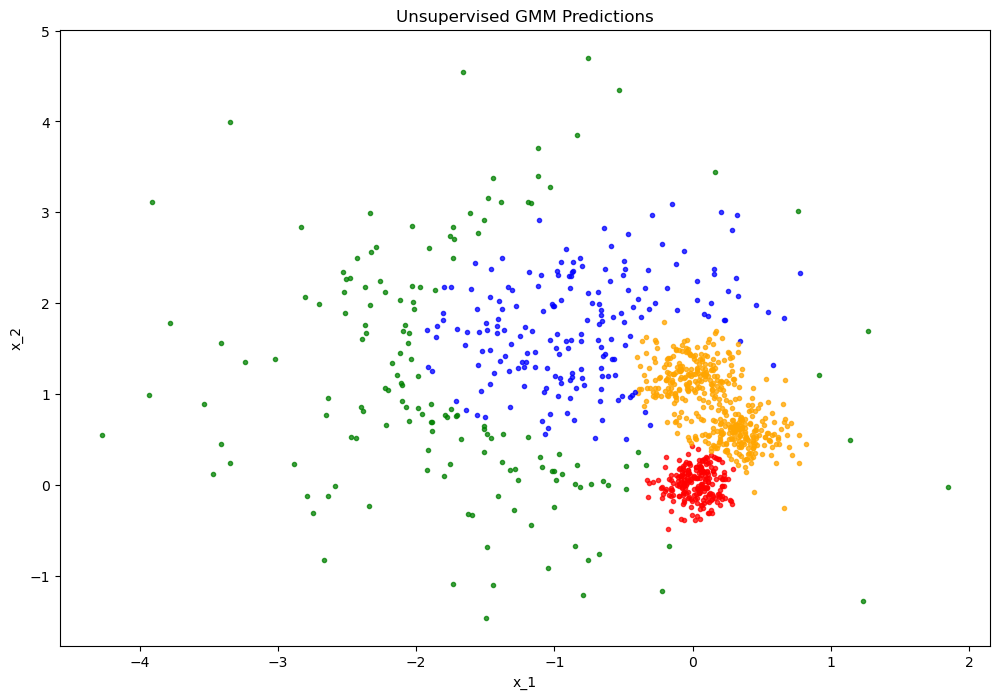

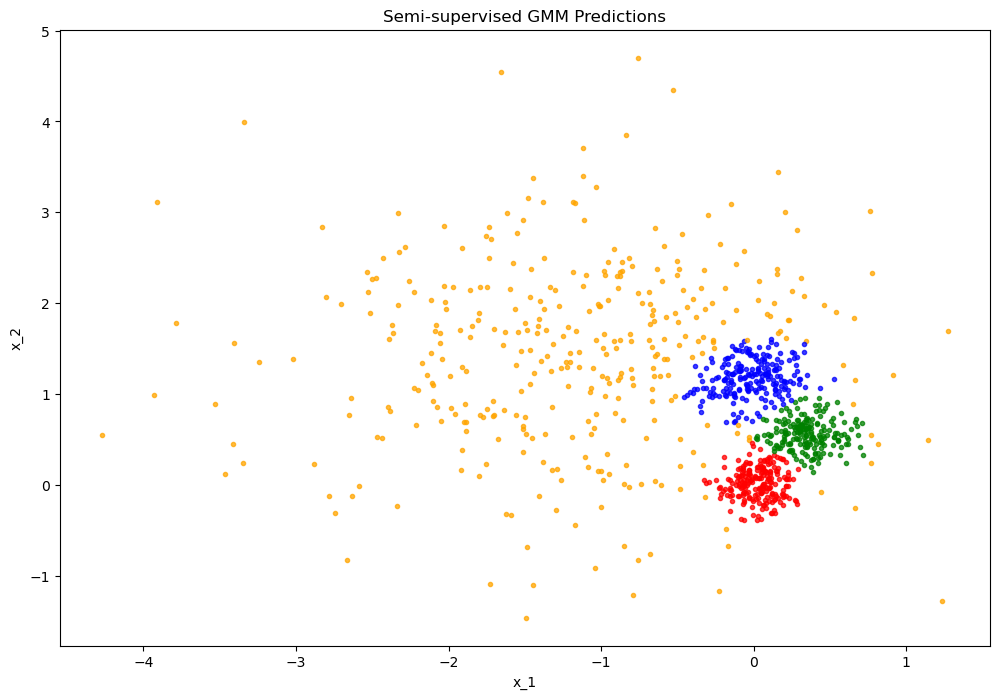

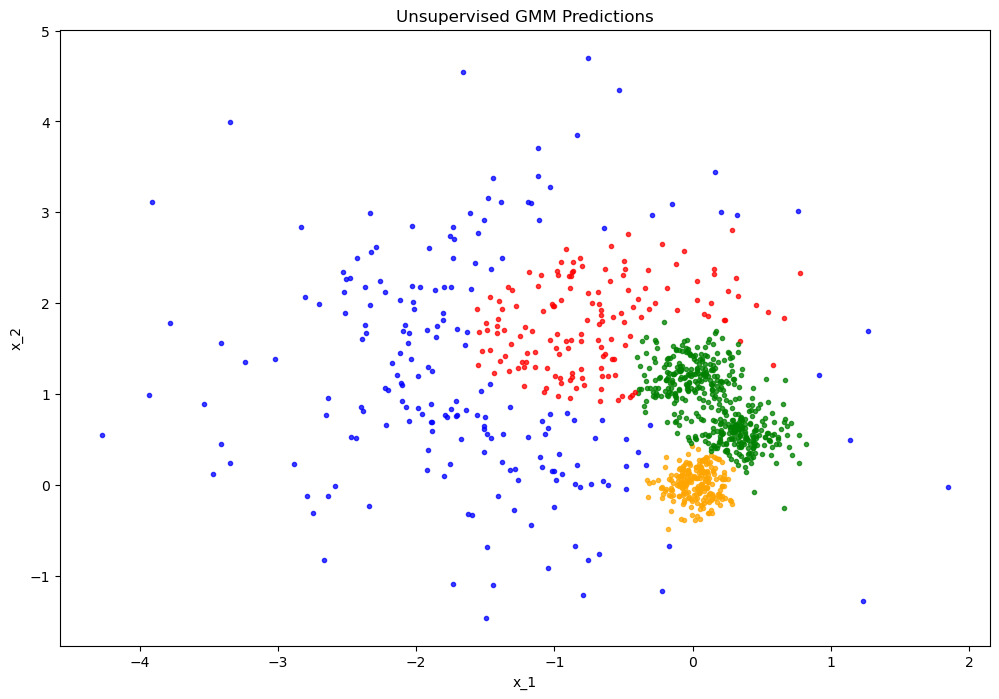

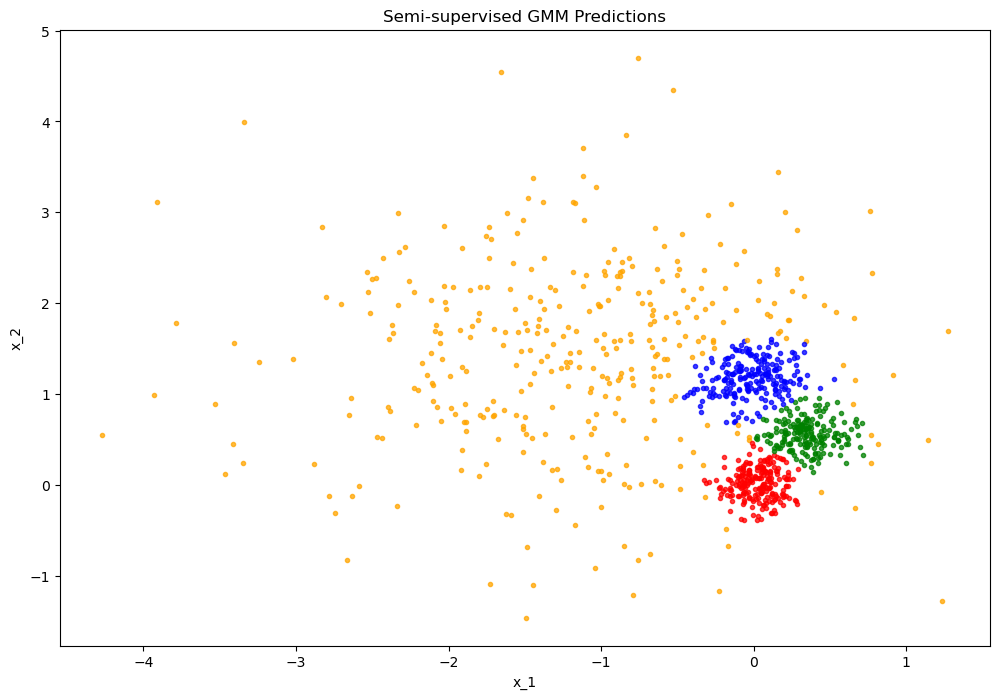

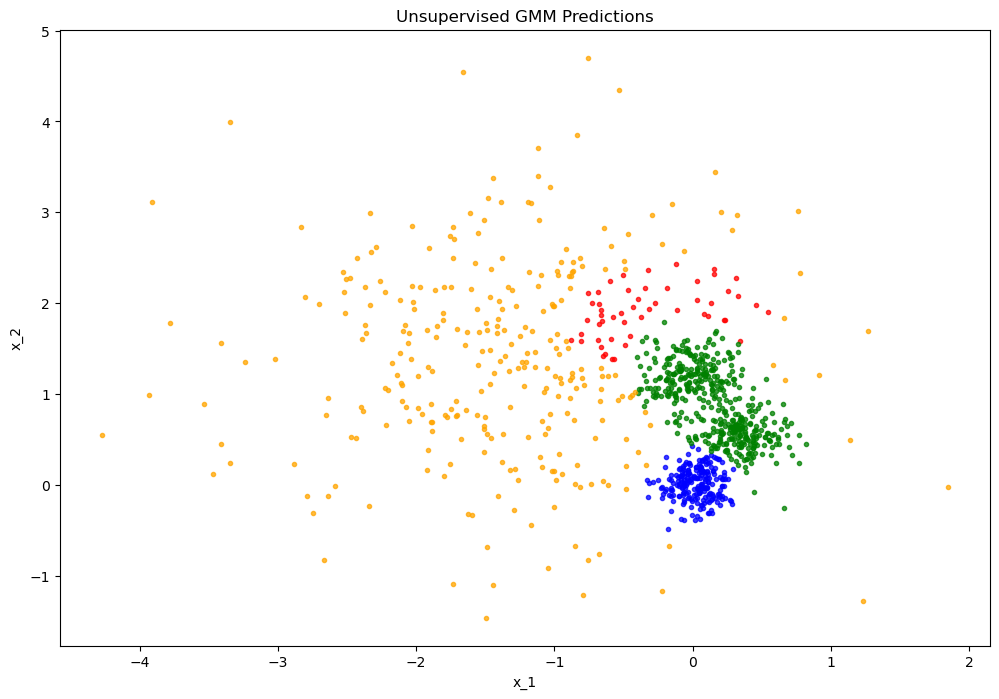

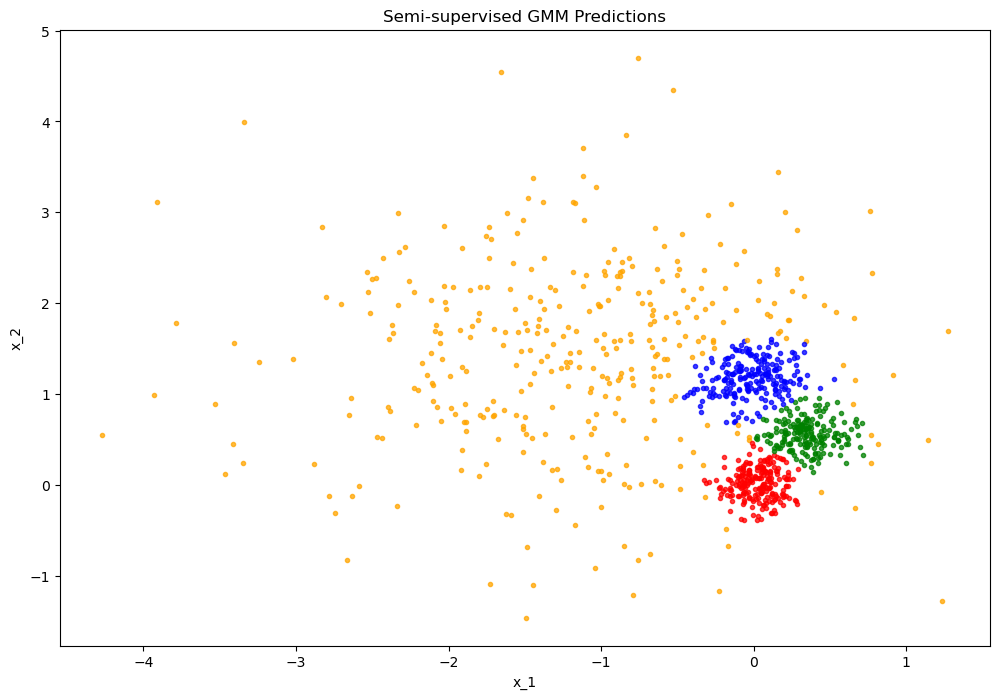

In [30]:
np.random.seed(229)
# Run NUM_TRIALS trials to see how different initializations
# affect the final predictions with and without supervision
for t in range(NUM_TRIALS):
    main(is_semi_supervised=False, trial_num=t)
    # *** START CODE HERE ***
    # Once you've implemented the semi-supervised version,
    # uncomment the following line.
    # You do not need to add any other lines in this code block.
    main(is_semi_supervised=True, trial_num=t)
    # *** END CODE HERE ***

### (f) Comparison of Unsupervised and Semi-supervised EM.

i. Semi-supervised EM converges faster than Unsupervised EM. The former takes about 100 - 120 iterations to converge, while the latter takes about 20 - 25 iterations.

ii. Results of Semi-supervised EM are more stable.

iii. Semi-supervised EM found three low-variance Gaussian distributions, and a high-variance Gaussian distribution, which corresponds to the ground truth and thus has better quality. 